# Extra-list intrusions

In [1]:
import numpy as np
import seaborn as sns
import quail
import pandas as pd
%matplotlib inline

# Load Data

In [2]:
man = quail.load_egg('../data/man_egg.egg')
auto = quail.load_egg('../data/auto_egg.egg')

## Andy extra-list intrusions replication - manual

In [3]:
import itertools

man_ext_rates = []

# loop over subjects
for isub in range(man.n_subjects):
    
    ext_rate = []
    
    # get subject data
    subj = man.crack(subjects=[isub])
    
    # make a list of all presented words
    all_pres = list(itertools.chain.from_iterable(subj.pres.values.tolist()))

    # iterate over lists within a subj
    for idx, lst in subj.rec.iterrows():
        
        # filter nans and nones
        lst = lst[lst.notna()]
        
        # get average extra-list intrusions
        ext_rate.append(lst.apply(lambda x: x not in all_pres).mean())
        
    man_ext_rates.append(np.mean(ext_rate))

## Andy extra-list intrusions replication - automatic

In [4]:
auto_ext_rates = []

# loop over subjects
for isub in range(auto.n_subjects):
    
    ext_rate = []
    
    # get subject data
    subj = auto.crack(subjects=[isub])
    
    # make a list of all presented words
    all_pres = list(itertools.chain.from_iterable(subj.pres.values.tolist()))

    # iterate over lists within a subj
    for idx, lst in subj.rec.iterrows():
        
        # filter nans and nones
        lst = lst[lst.notna()]
        
        # get proportion of extra-list intrusions
        ext_rate.append(lst.apply(lambda x: x not in all_pres).mean())
        
    auto_ext_rates.append(np.mean(ext_rate))

## Plot the correlation

(0, 0.3)

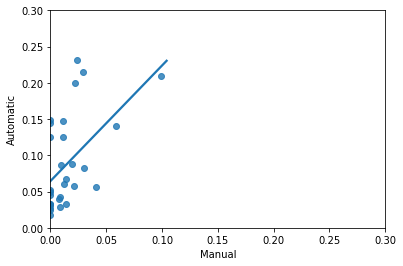

In [5]:
df = pd.DataFrame(np.array([man_ext_rates, auto_ext_rates]).T, columns=['Manual', 'Automatic'])
ax = sns.regplot(x='Manual', y='Automatic', data=df, ci=None)
ax.set_ylim([0, .3])
ax.set_xlim([0, .3])